In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("sine_data.txt",delimiter=",",names=["volt","ms"])

In [3]:
cutoff=50
RC=1/(2*3.1416*cutoff);
df["alpha"]=(df["ms"]/1000000)/(RC+(df["ms"]/1000000))
# df["alpha"]=(df["ms"])/(RC+(df["ms"]))
# df["alpha"]=[0.1 for i in df["alpha"]]

In [4]:
values=df[["alpha","volt"]].to_numpy()

In [5]:
volts_=[]
for i in range(len(values)):
    if i==0:
        value=values[i][1]*values[i][0]
        volts_.append(value)
    else:
        value=values[i][1]*values[i][0]+(1-values[i][0])*volts_[i-1]
        volts_.append(value)

In [6]:
df["volts_lowpass"]=volts_

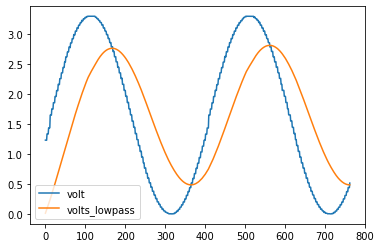

In [7]:
df[["volt","volts_lowpass"]].plot()

In [8]:
df["alpha"].describe

<bound method NDFrame.describe of 0      0.015769
1      0.015769
2      0.014856
3      0.015769
4      0.015465
         ...   
758    0.015465
759    0.015769
760    0.015465
761    0.015465
762    0.015465
Name: alpha, Length: 763, dtype: float64>